In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('임시_예측된2020인구수.csv', encoding='euc-kr')
df = df.dropna(subset=["시군구"]) 
df

ID     광역시도   시군구  2020년_계_예측 총인구수  2020년_지역별인구비율  계_20-39세  여_20-39세  \
1    서울 종로    서울특별시   종로구         149579.0       0.002882   43294.0   22026.0   
2    서울 중구    서울특별시    중구         126403.0       0.002436   39479.0   20229.0   
3    서울 용산    서울특별시   용산구         228425.0       0.004402   71334.0   36406.0   
4    서울 성동    서울특별시   성동구         298995.0       0.005761   96324.0   49205.0   
5    서울 광진    서울특별시   광진구         348217.0       0.006710  119162.0   61724.0   
..     ...      ...   ...              ...            ...       ...       ...   
272     함양     경상남도   함양군          39371.0       0.000759    5946.0    2684.0   
273     거창     경상남도   거창군          61889.0       0.001193   11235.0    5010.0   
274     합천     경상남도   합천군          44332.0       0.000854    5882.0    2604.0   
276     제주  제주특별자치도   제주시         494851.0       0.009535  127623.0   61548.0   
277    서귀포  제주특별자치도  서귀포시         183210.0       0.003530   39625.0   19182.0   

     계_65세이상      소멸비율  소멸위기지역  소멸위기고위험지역  
1    28020.0  0.786081   False      False  
2    23970.0  0.843930   False      False  
3    39352.0  0.925137   False      False  
4    45214.0  1.088269   False      False  
5    49797.0  1.239512   False      False  
..       ...       ...     ...        ...  
272  13012.0  0.206271    True      False  
273  16967.0  0.295279    True      False  
274  17347.0  0.150112    True       True  
276  69466.0  0.886016   False      False  
277  34967.0  0.548574   False      False  

[261 rows x 11 columns]

In [3]:
pop = pd.read_csv('2020년도_예측인구수.csv',encoding='euc-kr')
pop.head()

ID   광역시도  시군구  2020년_계_예측 총인구수  2020년_지역별인구비율  계_20-39세  여_20-39세  \
0  서울 종로  서울특별시  종로구         149579.0       0.002882   43294.0   22026.0   
1  서울 중구  서울특별시   중구         126403.0       0.002436   39479.0   20229.0   
2  서울 용산  서울특별시  용산구         228425.0       0.004402   71334.0   36406.0   
3  서울 성동  서울특별시  성동구         298995.0       0.005761   96324.0   49205.0   
4  서울 광진  서울특별시  광진구         348217.0       0.006710  119162.0   61724.0   

   계_65세이상      소멸비율  소멸위기지역  소멸위기고위험지역  
0  28020.0  0.786081   False      False  
1  23970.0  0.843930   False      False  
2  39352.0  0.925137   False      False  
3  45214.0  1.088269   False      False  
4  49797.0  1.239512   False      False

In [4]:
map_raw = pd.read_excel('draw_korea_raw(2021).xlsx')  
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.columns=['y','x','ID']
map.head()

(250, 3)


y   x      ID
0  0   7      철원
1  0   8      화천
2  0   9      양구
3  0  10  고성(강원)
4  1   3      양주

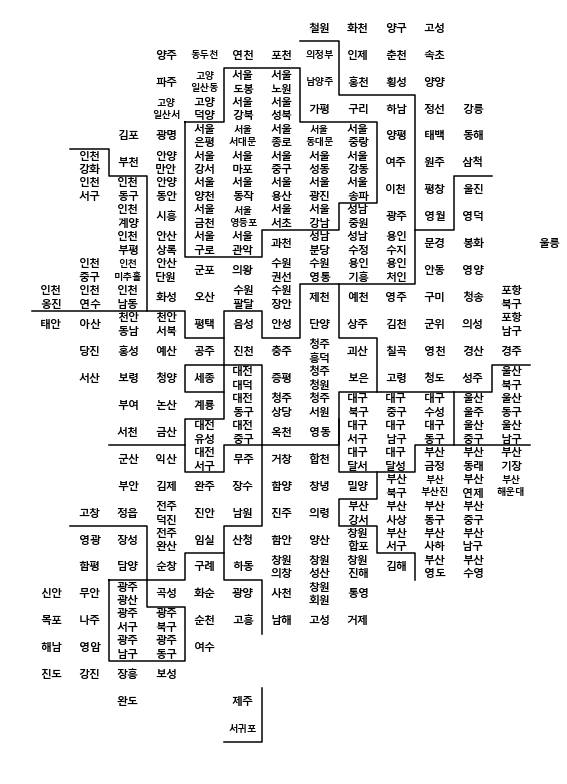

In [5]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus
import matplotlib.pyplot as plt

plt.figure(figsize=(8,11))
plt.rc('font',family='Malgun Gothic')

# 지역 이름 표시
for idx, row in map.iterrows():
    
        if len(row.ID.split()) == 2:
            dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
        elif row.ID[:2] == '고성':
             dispname = '고성'
        else:
            dispname = row.ID
            
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                    fontsize=fontsize, ha='center', va='center',
                    linespacing=linespacing)

# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs,ys,c='black',lw=1.5)
    
plt.gca().invert_yaxis()

plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
pop = pd.merge(pop, map, how='left', on='ID') #시군구 지역 인구현황 데이터 프레임과 지도 데이터 프레임을 ID기준으로 병합
print(pop.shape)
pop.head()

(261, 13)


ID   광역시도  시군구  2020년_계_예측 총인구수  2020년_지역별인구비율  계_20-39세  여_20-39세  \
0  서울 종로  서울특별시  종로구         149579.0       0.002882   43294.0   22026.0   
1  서울 중구  서울특별시   중구         126403.0       0.002436   39479.0   20229.0   
2  서울 용산  서울특별시  용산구         228425.0       0.004402   71334.0   36406.0   
3  서울 성동  서울특별시  성동구         298995.0       0.005761   96324.0   49205.0   
4  서울 광진  서울특별시  광진구         348217.0       0.006710  119162.0   61724.0   

   계_65세이상      소멸비율  소멸위기지역  소멸위기고위험지역    y    x  
0  28020.0  0.786081   False      False  4.0  6.0  
1  23970.0  0.843930   False      False  5.0  6.0  
2  39352.0  0.925137   False      False  6.0  6.0  
3  45214.0  1.088269   False      False  5.0  7.0  
4  49797.0  1.239512   False      False  6.0  7.0

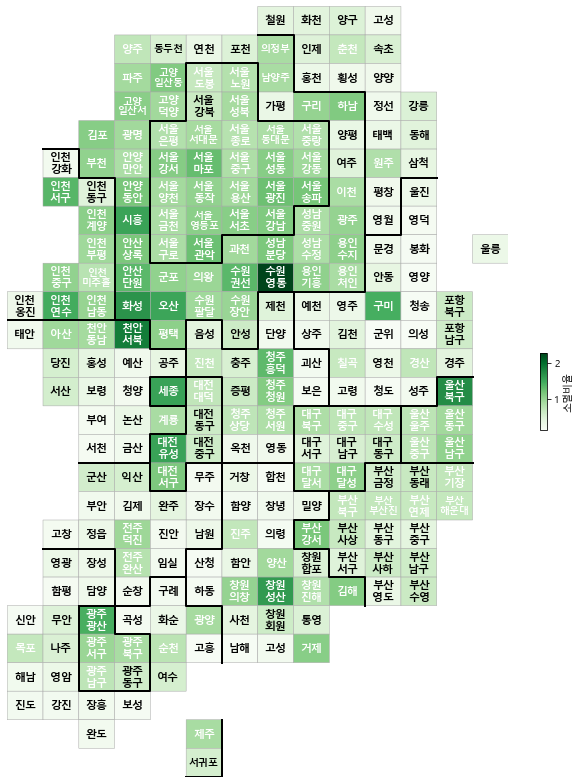

In [7]:
# 2020 소멸비율 기준 인구소멸 위기지역
drawKorea('소멸비율',pop,'Greens') 

In [8]:
# 소멸비율이 낮은 순으로 정렬(소멸비율이 낮을수록 인구소멸 위험인 지역)
top = pop['소멸비율'].tolist()
top.sort()
top

[0.1372767428461686,
 0.1373885439521964,
 0.1394626993471047,
 0.1501124113679598,
 0.1569487536107842,
 0.1577508543025784,
 0.1602852852852853,
 0.1603090294543698,
 0.1622390278585741,
 0.1622429249428722,
 0.1628120800622391,
 0.1663398949102031,
 0.1706586826347305,
 0.1739502999143101,
 0.1744450142867609,
 0.182143787444647,
 0.1823713646532438,
 0.1835813237557721,
 0.1923761255189518,
 0.1924327519952704,
 0.1949129971590909,
 0.2013135090759828,
 0.2017064846416382,
 0.2020214624407287,
 0.2043604943233196,
 0.2046107273150663,
 0.2062711343375345,
 0.2076968855385836,
 0.2101087941976427,
 0.2115577051367578,
 0.2119499394428744,
 0.2122626828509181,
 0.2152774716798166,
 0.2166755745590593,
 0.2173559406869799,
 0.2196038745120717,
 0.2203399697287227,
 0.220625,
 0.2245791245791245,
 0.2247872872872872,
 0.2260419973694952,
 0.2266558638849503,
 0.234304815627285,
 0.2391437845425037,
 0.2430067775723968,
 0.2430997876857749,
 0.2435553520020937,
 0.2466592213193668,
 0.2

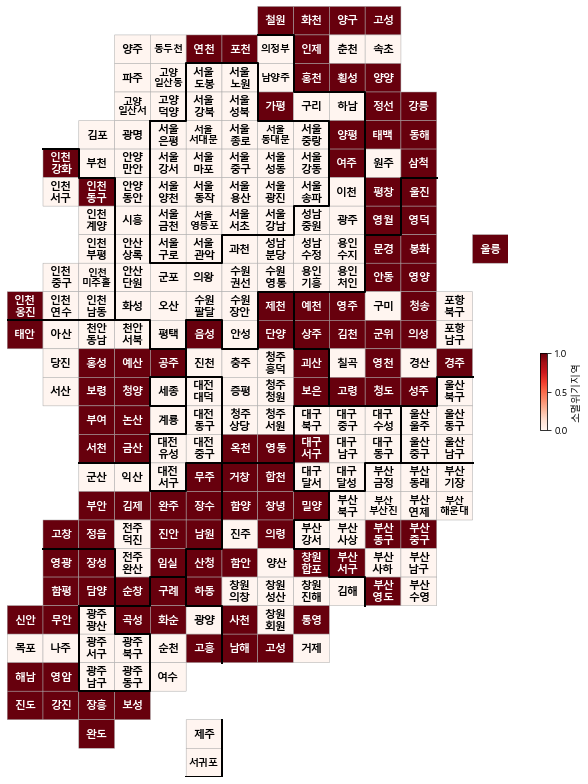

In [9]:
# 소멸 위기지역
pop['소멸위기지역'] = pop.소멸위기지역.astype(int)
drawKorea('소멸위기지역', pop, 'Reds') 

In [10]:
#소멸위험지역 리스트 추출
a = pop['소멸위기지역'].tolist()
g = pop['광역시도'].tolist()
c = pop['시군구'].tolist()
for a,g,c in zip(a,g,c):
    if a == 1:
        print(g,c)

부산광역시 중구
부산광역시 서구
부산광역시 동구
부산광역시 영도구
대구광역시 서구
인천광역시 동구
인천광역시 강화군
인천광역시 옹진군
경기도 포천시
경기도 여주시
경기도 연천군
경기도 가평군
경기도 양평군
강원도 강릉시
강원도 동해시
강원도 태백시
강원도 삼척시
강원도 홍천군
강원도 횡성군
강원도 영월군
강원도 평창군
강원도 정선군
강원도 철원군
강원도 화천군
강원도 양구군
강원도 인제군
강원도 고성군
강원도 양양군
충청북도 제천시
충청북도 보은군
충청북도 옥천군
충청북도 영동군
충청북도 괴산군
충청북도 음성군
충청북도 단양군
충청남도 공주시
충청남도 보령시
충청남도 논산시
충청남도 금산군
충청남도 부여군
충청남도 서천군
충청남도 청양군
충청남도 홍성군
충청남도 예산군
충청남도 태안군
전라북도 정읍시
전라북도 남원시
전라북도 김제시
전라북도 완주군
전라북도 진안군
전라북도 무주군
전라북도 장수군
전라북도 임실군
전라북도 순창군
전라북도 고창군
전라북도 부안군
전라남도 담양군
전라남도 곡성군
전라남도 구례군
전라남도 고흥군
전라남도 보성군
전라남도 화순군
전라남도 장흥군
전라남도 강진군
전라남도 해남군
전라남도 영암군
전라남도 무안군
전라남도 함평군
전라남도 영광군
전라남도 장성군
전라남도 완도군
전라남도 진도군
전라남도 신안군
경상북도 경주시
경상북도 김천시
경상북도 안동시
경상북도 영주시
경상북도 영천시
경상북도 상주시
경상북도 문경시
경상북도 군위군
경상북도 의성군
경상북도 청송군
경상북도 영양군
경상북도 영덕군
경상북도 청도군
경상북도 고령군
경상북도 성주군
경상북도 예천군
경상북도 봉화군
경상북도 울진군
경상북도 울릉군
경상남도 마산합포구
경상남도 통영시
경상남도 사천시
경상남도 밀양시
경상남도 의령군
경상남도 함안군
경상남도 창녕군
경상남도 고성군
경상남도 남해군
경상남도 하동군
경상남도 산청군
경상남도 함양군
경상남도 거창군
경상남도 합천군


In [11]:
#소멸위험지역 리스트 추출(소멸비율도 함께)
a = pop['소멸위기지역'].tolist()
g = pop['광역시도'].tolist()
c = pop['시군구'].tolist()
x = pop['소멸비율'].tolist()
for a,g,c,x in zip(a,g,c,x):
    if a == 1:
        print(g,c,x)

부산광역시 중구 0.4184518451845184
부산광역시 서구 0.4564119700007426
부산광역시 동구 0.4312355330392627
부산광역시 영도구 0.3340511007552627
대구광역시 서구 0.4524577167019027
인천광역시 동구 0.4447209384998222
인천광역시 강화군 0.2152774716798166
인천광역시 옹진군 0.2699374881606365
경기도 포천시 0.4786108316275196
경기도 여주시 0.4496441575637206
경기도 연천군 0.3323901317534707
경기도 가평군 0.3314043930060357
경기도 양평군 0.3368855734647662
강원도 강릉시 0.4878255063432005
강원도 동해시 0.4423861506230014
강원도 태백시 0.3190814040328603
강원도 삼척시 0.3819107662463628
강원도 홍천군 0.3020763563295378
강원도 횡성군 0.252030719243834
강원도 영월군 0.2391437845425037
강원도 평창군 0.2466775272228414
강원도 정선군 0.2568608094768015
강원도 철원군 0.4167486715213541
강원도 화천군 0.4288804759329367
강원도 양구군 0.4773413897280967
강원도 인제군 0.463125
강원도 고성군 0.2509539557364538
강원도 양양군 0.2510838150289017
충청북도 제천시 0.4527617534284431
충청북도 보은군 0.1823713646532438
충청북도 옥천군 0.2570687246357527
충청북도 영동군 0.2512434466998252
충청북도 괴산군 0.2046107273150663
충청북도 음성군 0.4238971514998739
충청북도 단양군 0.2245791245791245
충청남도 공주시 0.3624564619615032
충청남도 보령시 0.329151291

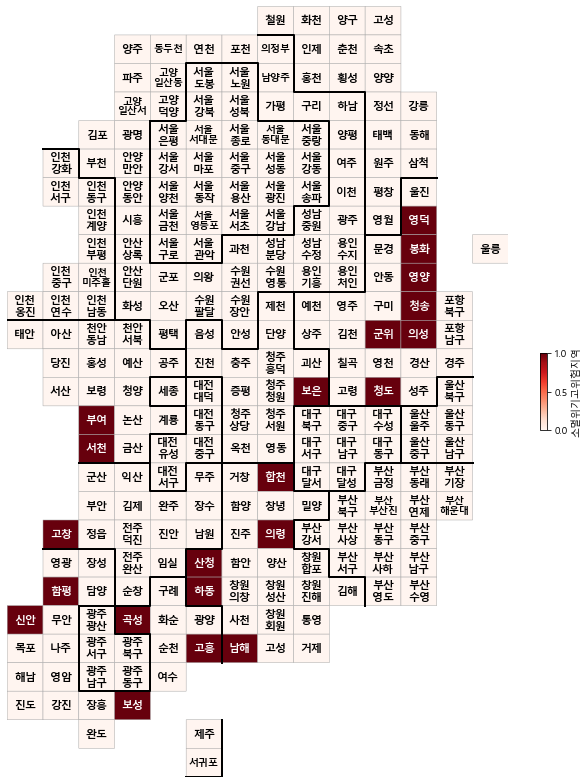

In [12]:
# 소멸 고위험지역
pop['소멸위기고위험지역'] = pop.소멸위기고위험지역.astype(int)
drawKorea('소멸위기고위험지역', pop, 'Reds') 

In [13]:
#소멸고위험지역 리스트 추출
b = pop['소멸위기고위험지역'].tolist()
g = pop['광역시도'].tolist()
c = pop['시군구'].tolist()
for b,g,c in zip(b,g,c):
    if b == 1:
        print(g,c)

충청북도 보은군
충청남도 부여군
충청남도 서천군
전라북도 고창군
전라남도 곡성군
전라남도 고흥군
전라남도 보성군
전라남도 함평군
전라남도 신안군
경상북도 군위군
경상북도 의성군
경상북도 청송군
경상북도 영양군
경상북도 영덕군
경상북도 청도군
경상북도 봉화군
경상남도 의령군
경상남도 남해군
경상남도 하동군
경상남도 산청군
경상남도 합천군


In [16]:
#소멸고위험지역 리스트 추출(소멸비율도 함께)
b = pop['소멸위기고위험지역'].tolist()
g = pop['광역시도'].tolist()
c = pop['시군구'].tolist()
x = pop['소멸비율'].tolist()
for b,g,c,x in zip(b,g,c,x):
    if b == 1:
        print(g,c,x)

충청북도 보은군 0.1823713646532438
충청남도 부여군 0.1949129971590909
충청남도 서천군 0.1706586826347305
전라북도 고창군 0.1923761255189518
전라남도 곡성군 0.1924327519952704
전라남도 고흥군 0.1372767428461686
전라남도 보성군 0.1622390278585741
전라남도 함평군 0.1739502999143101
전라남도 신안군 0.1628120800622391
경상북도 군위군 0.1394626993471047
경상북도 의성군 0.1373885439521964
경상북도 청송군 0.1569487536107842
경상북도 영양군 0.1603090294543698
경상북도 영덕군 0.1744450142867609
경상북도 청도군 0.1602852852852853
경상북도 봉화군 0.1622429249428722
경상남도 의령군 0.1835813237557721
경상남도 남해군 0.1577508543025784
경상남도 하동군 0.182143787444647
경상남도 산청군 0.1663398949102031
경상남도 합천군 0.1501124113679598


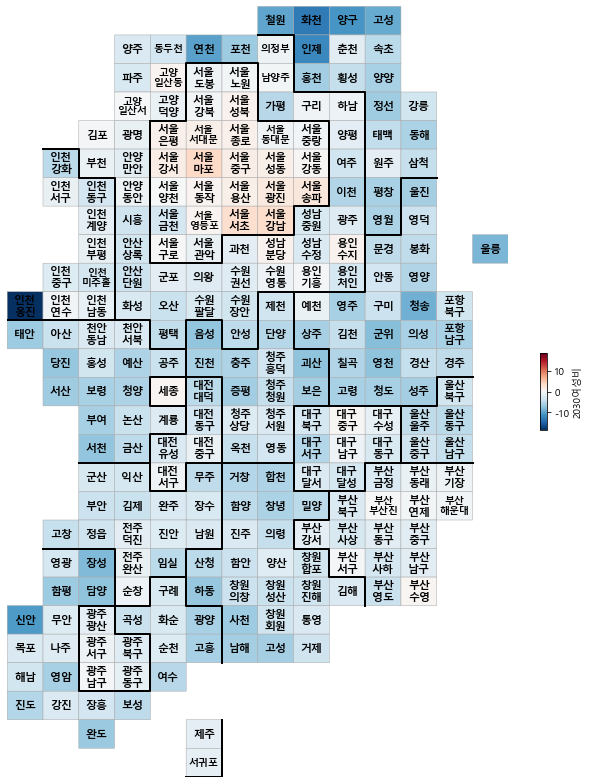

In [17]:
# 2-30대 여성비
pop['2030여성비'] = (pop['여_20-39세'] / pop['계_20-39세'] - 0.5) * 100
drawKoreaMinus('2030여성비', pop, 'RdBu_r')

In [18]:
import matplotlib.pyplot as plt
import numpy as np

### 산업 독립변수와 종속변수와의 상관관계 그래프로 표현
-(각 지역별 분류별 매출, 각 지역별 분류별 종사자수) / (평균매출,인구수)와의 상관관계 분석\
각 시군구 매출액-이미 있음\
-종사자수와 평균 종사자수와의 관계\
-(지역 매출/전체 매출) / (종사자수/평균 종사자수)

In [19]:
#지역별 인구수와 인구 소멸율 
plt.figure(figsize=(14,10))
plt.scatter(pop['2020년_계_예측 총인구수'],pop['소멸비율'],s=(pop['소멸비율']*10)**2)
plt.title('2020년도 인구수 대비 소멸비율',fontsize=20)

fp1 = np.polyfit(pop['2020년_계_예측 총인구수'],pop['소멸비율'], 1)   #np.polyfit:직선을 구성하기 위한 계수 계산
fx = np.linspace(0,832227,2)
fy = np.poly1d(fp1)              #np.poly1d:polyfit으로 찾은 계수로 파이썬에서 사용할 함수를 만들어줌
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='r')


In [20]:
#지역별 청년여성 인구와 인구 소멸율 
pop['20-39세여자비율']=pop['여_20-39세']/pop['계_20-39세'] # 20-39세여자비율

plt.figure(figsize=(14,10))
plt.scatter(pop['20-39세여자비율'],pop['소멸비율'],s=(pop['소멸비율']*10)**2)
plt.xlabel('2020년도 20-39세여자비율')
plt.ylabel('소멸비율')
plt.title('20-39세여자비율 대비 소멸비율',fontsize=20)

fp1 = np.polyfit(pop['20-39세여자비율'],pop['소멸비율'], 1)
fx = np.linspace(0.3,0.6,2)
fy = np.poly1d(fp1)
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='r')

In [21]:
#지역별 청년 인구와 인구 소멸율
pop['20-39세청년비율']=pop['계_20-39세']/pop['2020년_계_예측 총인구수']
plt.figure(figsize=(14,10))
plt.scatter(pop['20-39세청년비율'],pop['소멸비율'],s=(pop['소멸비율']*10)**2)
plt.xlabel('2020년도 20-39세청년비율')
plt.ylabel('소멸비율')
plt.title('20-39세청년비율 대비 소멸비율',fontsize=20)

fp1 = np.polyfit(pop['20-39세청년비율'],pop['소멸비율'], 1)
fx = np.linspace(0,0.4,2)
fy = np.poly1d(fp1)
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='r')

In [22]:
#지역별 노년 인구와 인구 소멸율 
pop['65세이상비율']=pop['계_65세이상']/pop['2020년_계_예측 총인구수']
plt.figure(figsize=(14,10))
plt.scatter(pop['65세이상비율'],pop['소멸비율'],s=(pop['소멸비율']*10)**2)
plt.xlabel('2020년도 65세이상비율')
plt.ylabel('소멸비율')
plt.title('65세이상비율 대비 소멸비율',fontsize=20)

fp1 = np.polyfit(pop['65세이상비율'],pop['소멸비율'], 1)
fx = np.linspace(0,0.4,2)
fy = np.poly1d(fp1)
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='r')